In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)-sindhi'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['sindhi_text'].values
val_texts = val_df['sindhi_text'].values
test_texts = test_df['sindhi_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مان هڪ منهنجو نيگا رويو سوووو خراب آهي پر هو هميشه غار پهرين cus he kno I stand on bus but lutely 😂🤣 1
@khawarkhatana @ashoswai توهان کي پنهنجي نفرت ۽ حسد سان توهان کي ٿورو اسلامو فوبڪ POS ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور تي مسلمانن سان امن ۾ رهندا آهن، اڄ به انهن کي ڪيترن ئي مسلمان ۽ عرب ملڪن ۾ ڀليڪار آهي، اهو مذهب بابت ناهي، اسان ساڳيا آهيون... https://t.co/NvrFlxZucP 1
@dartwalker @GraniteElements توهان کي گهرجي!
مون هن کي ڪرسمس تي ٻاهر ڪڍيو - اهو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل هو 0
@EstherMcVey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون (جيڪو به سوال اهي تصور ڪندا ته توهان پڇيو) 0
هي ڏاڍو عجيب آهي.  مان هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي ۽ خاص طور تي هي سڪو ڪاميابي حاصل ڪندو.، https://t.co/wB5RQb0EYJ 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="sindhi")
    , train_labels[i])

منهنجو نيگا رويو سوووو خراب آهي پر هميشه غار پهرين cus he kno i stand on bus but lutely 😂🤣 1
khawarkhatana ashoswai کي پنهنجي نفرت حسد سان کي ٿورو اسلامو فوبڪ pos ڏسو، لکين هندو مسلمان قومن ۾ رهن ٿا، يهودي تاريخي طور مسلمانن سان امن ۾ رهندا آهن، انهن کي ڪيترن ئي مسلمان عرب ملڪن ۾ ڀليڪار آهي، مذهب بابت ناهي، اسان ساڳيا آهيون 1
dartwalker graniteelements کي گهرجي مون هن کي ڪرسمس ٻاهر ڪڍيو منهنجي سلائي بيگ ۾ سالن کان اڻڄاتل 0
esthermcvey1 اسان انهن جو جواب ٻڌڻ جا منتظر آهيون جيڪو تصور ڪندا ته پڇيو 0
ڏاڍو عجيب آهي هن پروجيڪٽ کان متاثر آهيان، اميد آهي ته هن واقعي سان ڪميونٽي خاص طور سڪو ڪاميابي حاصل ڪندو، 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="sindhi") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="sindhi") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="sindhi") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.94it/s, loss=0.493]


Train loss 0.5701018465862114 accuracy 0.6747931587036856
Validation loss 0.47759455889463426 accuracy 0.7543902678308644
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.7543902678308644
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 239/239 [01:19<00:00,  3.00it/s, loss=0.466]


Train loss 0.4596502242227977 accuracy 0.7610124595310508
Validation loss 0.45026247575879097 accuracy 0.772441871872854
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.772441871872854
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.93it/s, loss=0.427]


Train loss 0.4305512168168024 accuracy 0.7802413420975179
Validation loss 0.4253647103905678 accuracy 0.7844108702050427
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.7844108702050427
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.94it/s, loss=0.42] 


Train loss 0.4097416228829069 accuracy 0.7924065535171196
Validation loss 0.4197759937494993 accuracy 0.7901501030118709
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.7901501030118709
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.96it/s, loss=0.409]


Train loss 0.3873741054385277 accuracy 0.8050459465646359
Validation loss 0.41721360869705676 accuracy 0.7966251348964977
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.7966251348964977
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.93it/s, loss=0.382]


Train loss 0.3686619893526931 accuracy 0.814693090029105
Validation loss 0.4135918110609055 accuracy 0.7991759050328657
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.7991759050328657
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.92it/s, loss=0.375]


Train loss 0.35166101363413504 accuracy 0.8261879067333792
Validation loss 0.4134754091501236 accuracy 0.7992740115765722
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.7992740115765722
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.93it/s, loss=0.337]


Train loss 0.3310855824079474 accuracy 0.8375682658033291
Validation loss 0.4136368211358786 accuracy 0.8039831256744825
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.8039831256744825
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.93it/s, loss=0.366]


Train loss 0.3184791565190798 accuracy 0.8442558618659864
Validation loss 0.43284568525850775 accuracy 0.7940743647601295
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.95it/s, loss=0.378]


Train loss 0.30335966906038786 accuracy 0.8525622158998005
Validation loss 0.4352841440588236 accuracy 0.797557147061709
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.93it/s, loss=0.308]


Train loss 0.2858798881080859 accuracy 0.8602962817619936
Validation loss 0.4751562997698784 accuracy 0.7934366722260375
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 239/239 [01:22<00:00,  2.91it/s, loss=0.299]


Train loss 0.271452715581431 accuracy 0.8694365414173125
Validation loss 0.48120758049190043 accuracy 0.7892671441185127
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.96it/s, loss=0.315]


Train loss 0.2637010948054461 accuracy 0.8735897184342196
Validation loss 0.5275577314198017 accuracy 0.7754341214559012
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


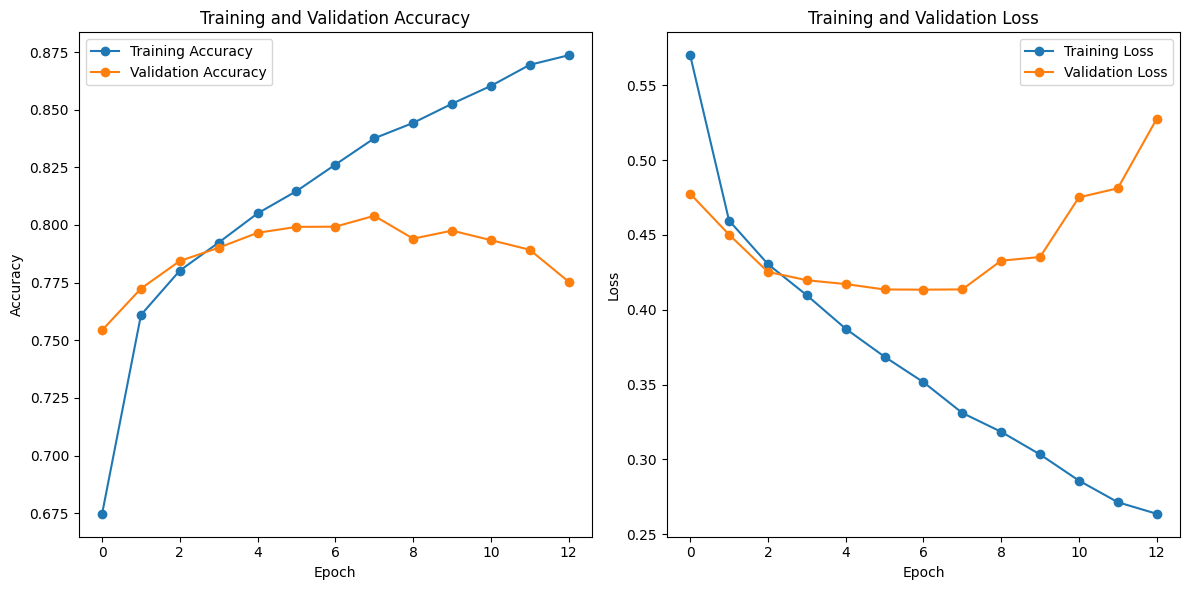

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.7726492372590377 Test Loss: 0.5219631344079971


Accuracy: 0.77
F1 Score: 0.77
Precision: 0.78
Recall: 0.77

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.70      0.82      0.75      8612
        Hate       0.85      0.74      0.79     11775

    accuracy                           0.77     20387
   macro avg       0.77      0.78      0.77     20387
weighted avg       0.78      0.77      0.77     20387



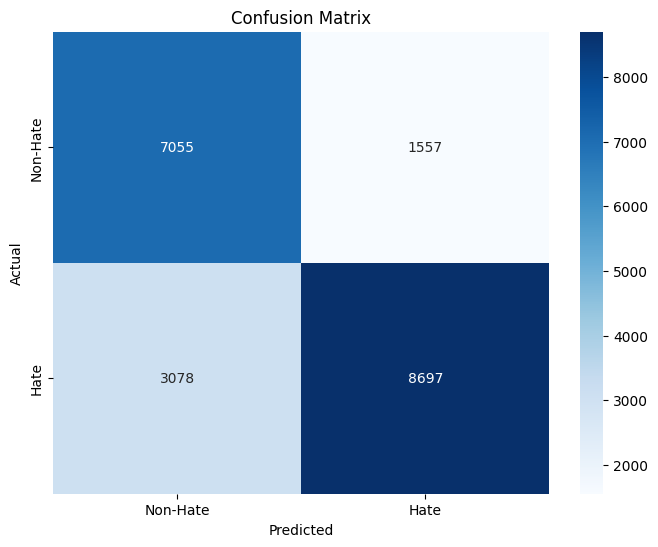

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 1.00
